# Import libs

In [1]:
import pandas as pd
import numpy as np
from knn.knn import knn
from dmc.dmc import dmc
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
from utils.functions import confusion_matrix, confusion_matrix_mean
from matplotlib import pyplot as plt

# Loading Iris dataset

In [2]:
Xy = pd.read_csv('./datasets/iris.csv')
X = Xy.drop(['class'], axis=1)
y = Xy['class']

# Instantiating models

In [3]:
knn_model = knn(k=3, type_distance_calc='euclidean')
dmc_model = dmc(type_distance_calc='euclidean')

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Running the tests and computing informations

In [4]:
realizations = 20
knn_hit_rate_list = []
dmc_hit_rate_list = []
knn_std_dev = 0
dmc_std_dev = 0
knn_confusion_matrix_list = []
dmc_confusion_matrix_list = []

for r in range(realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    knn_model.fit(X_train, y_train)
    dmc_model.fit(X_train, y_train)

    knn_hit_rate_list.append(knn_model.score(X_test, y_test))
    dmc_hit_rate_list.append(dmc_model.score(X_test, y_test))

    knn_y_pred = [knn_model.predict(x) for x in X_test.values]
    dmc_y_pred = [dmc_model.predict(x) for x in X_test.values]

    knn_confusion_matrix_list.append(confusion_matrix(y_test, knn_y_pred))
    dmc_confusion_matrix_list.append(confusion_matrix(y_test, dmc_y_pred))

knn_std_dev = np.std(knn_hit_rate_list)
dmc_std_dev = np.std(dmc_hit_rate_list)

# Showing knn informations computed

In [5]:
print('----------------- KNN model -----------------')
print('Hit rate:')
print(knn_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(knn_hit_rate_list)/len(knn_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(knn_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in knn_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KNN model -----------------
Hit rate:
[0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 1.0, 1.0, 0.9333333333333333, 0.9333333333333333, 0.9, 1.0, 1.0, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 1.0, 1.0]

Accuracy:
0.9566666666666667

Standard Deviation:
0.03179797338056485

Confusion Matrix:
                 Iris-versicolor  Iris-setosa  Iris-virginica
Iris-versicolor                6            0               1
Iris-setosa                    0           10               0
Iris-virginica                 1            0              12
                 Iris-versicolor  Iris-virginica  Iris-setosa
Iris-versicolor               11               2            0
Iris-virginica                 0               8            0
Iris-setosa                    0               0            9
                 Iris-setosa  Iris-virginica  Iris-versicolor


In [7]:
confusion_matrix_mean(knn_confusion_matrix_list)

,Iris-versicolor,Iris-virginica,Iris-setosa
Iris-versicolor,9,0,0
Iris-virginica,0,9,0
Iris-setosa,0,0,10


In [30]:
knn_confusion_matrix_list[1] # 1, 12

,Iris-versicolor,Iris-setosa,Iris-virginica
Iris-versicolor,9,0,2
Iris-setosa,0,9,0
Iris-virginica,0,0,10


# Showing dmc informations computed

In [6]:
print('----------------- DMC model -----------------')
print('Hit rate:')
print(dmc_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(dmc_hit_rate_list)/len(dmc_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(dmc_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in dmc_confusion_matrix_list:
    print(matrix, end='\n')

----------------- DMC model -----------------
Hit rate:
[0.8666666666666667, 0.8666666666666667, 1.0, 0.9333333333333333, 0.9333333333333333, 0.8666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 1.0, 0.9, 0.9666666666666667, 0.8666666666666667, 0.9666666666666667, 0.9, 0.9666666666666667, 0.9333333333333333, 0.9, 0.9666666666666667, 0.9666666666666667]

Accuracy:
0.9333333333333332

Standard Deviation:
0.043461349368017654

Confusion Matrix:
                 Iris-versicolor  Iris-setosa  Iris-virginica
Iris-versicolor                5            0               2
Iris-setosa                    0           10               0
Iris-virginica                 2            0              11
                 Iris-versicolor  Iris-virginica  Iris-setosa
Iris-versicolor               10               3            0
Iris-virginica                 1               7            0
Iris-setosa                    0               0            9
                 Iris-setosa  I

In [32]:
confusion_matrix_mean(dmc_confusion_matrix_list)

,Iris-versicolor,Iris-virginica,Iris-setosa
Iris-versicolor,9,0,0
Iris-virginica,1,8,0
Iris-setosa,0,0,10


In [53]:
dmc_confusion_matrix_list[12]

,Iris-setosa,Iris-virginica,Iris-versicolor
Iris-setosa,11,0,0
Iris-virginica,0,8,1
Iris-versicolor,0,0,10


# Choosing two columns from the last X_train and X_test to plot decision surface

In [7]:
X_train_2d, X_test_2d = X_train[['sepal-length', 'sepal-width']], X_test[['sepal-length', 'sepal-width']]

print('Train dataset:')
print(X_train_2d)
print('Test dataset:')
print(X_test_2d)

Train dataset:
     sepal-length  sepal-width
20            5.4          3.4
41            4.5          2.3
36            5.5          3.5
89            5.5          2.5
140           6.7          3.1
..            ...          ...
9             4.9          3.1
8             4.4          2.9
44            5.1          3.8
6             4.6          3.4
119           6.0          2.2

[120 rows x 2 columns]
Test dataset:
     sepal-length  sepal-width
79            5.7          2.6
13            4.3          3.0
102           7.1          3.0
113           5.7          2.5
143           6.8          3.2
57            4.9          2.4
98            5.1          2.5
91            6.1          3.0
3             4.6          3.1
10            5.4          3.7
105           7.6          3.0
112           6.8          3.0
146           6.3          2.5
58            6.6          2.9
53            5.5          2.3
60            5.0          2.0
120           6.9          3.2
14            5.8

# Training the models with the new dataset 2d

In [8]:
knn_model = knn(k=3, type_distance_calc='euclidean')
knn_model.fit(X_train_2d, y_train)
dmc_model = dmc(type_distance_calc='euclidean')
dmc_model.fit(X_train_2d, y_train)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Plotting knn decision surface

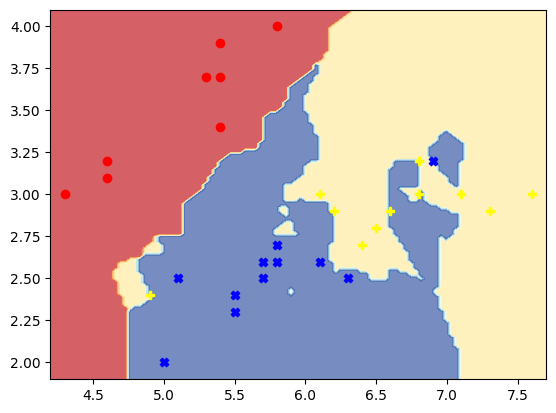

In [10]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[knn_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'Iris-setosa':
        y_pred[0][i] = 1
    elif y == 'Iris-virginica':
        y_pred[0][i] = 2
    else:
        y_pred[0][i] = 3

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

knn_y_pred = np.array([knn_model.predict(x) for x in X_test_2d.values])

setosa = np.where(knn_y_pred == 'Iris-setosa')
virginica = np.where(knn_y_pred == 'Iris-virginica')
versicolor = np.where(knn_y_pred == 'Iris-versicolor')

plt.scatter(data[setosa, 0], data[setosa, 1],
            color='red', marker='o', label='setosa')
plt.scatter(data[versicolor, 0], data[versicolor, 1],
            color='blue', marker='X', label='versicolor')
plt.scatter(data[virginica, 0], data[virginica, 1],
            color='yellow', marker='P', label='virginica')

plt.show()

# Plotting dmc decision surface

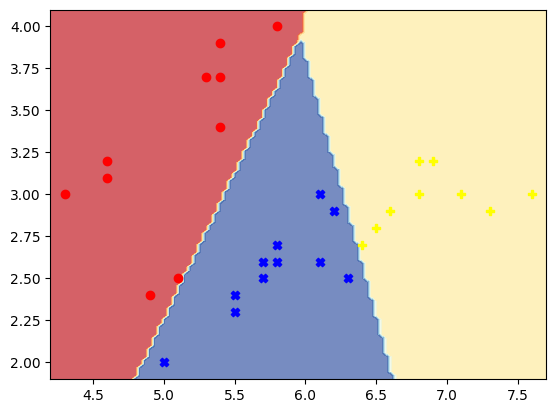

In [12]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[dmc_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'Iris-setosa':
        y_pred[0][i] = 1
    elif y == 'Iris-virginica':
        y_pred[0][i] = 2
    else:
        y_pred[0][i] = 3

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

dmc_y_pred = np.array([dmc_model.predict(x) for x in X_test_2d.values])

setosa = np.where(dmc_y_pred == 'Iris-setosa')
virginica = np.where(dmc_y_pred == 'Iris-virginica')
versicolor = np.where(dmc_y_pred == 'Iris-versicolor')

plt.scatter(data[setosa, 0], data[setosa, 1],
            color='red', marker='o', label='setosa')
plt.scatter(data[versicolor, 0], data[versicolor, 1],
            color='blue', marker='X', label='versicolor')
plt.scatter(data[virginica, 0], data[virginica, 1],
            color='yellow', marker='P', label='virginica')

plt.show()